Mercedes-Benz Greener Manufacturing

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Check for null and unique values for test and train sets.
Apply label encoder.
Perform dimensionality reduction.
Predict your test_df values using XGBoost.

The data set is already divided into train and test

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing csv module
import csv
# csv file name
train_df = pd.read_csv(r'D:\OneDrive\Studies\AI - ML\Python\Examples\ML Pracs\train.csv')

In [4]:
# importing csv module
import csv
# csv file name
test_df = pd.read_csv(r'D:\OneDrive\Studies\AI - ML\Python\Examples\ML Pracs\test.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [7]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
test_df.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
print("Number of datapoints: ", train_df.shape[0])
print("Number of features: ", train_df.shape[1])
train_df.head()

Number of datapoints:  4209
Number of features:  378


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print("Number of datapoints: ", test_df.shape[0])
print("Number of features: ", test_df.shape[1])
test_df.head()

Number of datapoints:  4209
Number of features:  377


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["feature name","dtypes"]
dtype_df.groupby("dtypes").agg("count").reset_index()

,dtypes,feature name
0,int64,369
1,float64,1
2,object,8


there are 369 binary features, 
8 features which have datatype = ‘object’ is most probably categorical features and 
1 remaining feature is our target variable i.e. ‘y’.

Performing univariate analysis on categorical features, to get the insight out of it.
Any feature that has very low variance as compared to other categorical features, will be removed 

In [12]:
dtype_df = test_df.dtypes.reset_index()
dtype_df.columns = ["feature name","dtypes"]
dtype_df.groupby("dtypes").agg("count").reset_index()

,dtypes,feature name
0,int64,369
1,object,8


Question 1: 
If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Starting with train and then with test data

In [13]:
variance = pow(train_df.drop(columns={'ID','y'}).std(),2).to_dict()

null_cnt = 0
for key, value in variance.items():
    if(value==0):
        print('Name = ',key)
        null_cnt = null_cnt+1
print('No of columns which has zero variance = ',null_cnt)

Name =  X11
Name =  X93
Name =  X107
Name =  X233
Name =  X235
Name =  X268
Name =  X289
Name =  X290
Name =  X293
Name =  X297
Name =  X330
Name =  X347
No of columns which has zero variance =  12


In [14]:
train_df = train_df.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})
train_df.shape

(4209, 366)

In [15]:
variance = pow(test_df.drop(columns={'ID'}).std(),2).to_dict()

null_cnt = 0
for key, value in variance.items():
    if(value==0):
        print('Name = ',key)
        null_cnt = null_cnt+1
print('No of columns which has zero variance = ',null_cnt)

Name =  X257
Name =  X258
Name =  X295
Name =  X296
Name =  X369
No of columns which has zero variance =  5


In [16]:
train_df = train_df.drop(columns={'X257','X258','X295','X296','X369'})
train_df.shape

(4209, 361)

Question 2: 
Check for null and unique values for test and train sets.

In [17]:
print(train_df.nunique())
print(test_df.nunique())

ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 361, dtype: int64
ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 377, dtype: int64


In [18]:
#Check for null value
print(train_df.isnull().sum().any())
print(test_df.isnull().sum().any())

False
False


In [19]:
train_df.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [20]:
test_df.describe(include='object')


,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [21]:
dup_ID = train_df['ID'].duplicated().sum()
print(f"Here we have {dup_ID} duplicate IDs")

Here we have 0 duplicate IDs


No null data, all unique values across the file listed.
Henceforth working with Train data only as it is the data that we would use for our model. 

Question 3: 
Apply label encoder.

No null variable. All the variables are categorical applying encoder

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in train_df.columns:
    train_df[i]=le.fit_transform(train_df[i])

In [23]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,2466,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,1,366,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,2,69,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,3,133,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,4,106,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [24]:
train_df.corr()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,1.000000,-0.053835,-0.012938,0.085511,-0.022195,-0.032942,0.018940,0.649727,-0.017728,0.006444,...,0.045307,-0.079988,-0.022990,0.030387,0.023399,-0.013644,-0.038092,-0.009363,-0.015531,0.028997
y,-0.053835,1.000000,-0.235347,0.012417,0.111803,-0.153171,-0.015482,-0.035435,0.001477,-0.003473,...,0.021055,0.131811,0.055796,-0.226880,0.073029,0.047247,-0.139801,0.018200,-0.003465,-0.024460
X0,-0.012938,-0.235347,1.000000,-0.271123,-0.139904,-0.070645,0.017988,0.012293,0.037549,0.047735,...,0.113272,0.070546,0.045173,-0.102136,0.083352,-0.038618,-0.060401,-0.011174,0.009110,0.011660
X1,0.085511,0.012417,-0.271123,1.000000,0.088266,0.205657,-0.020724,0.046417,-0.079119,-0.000306,...,0.056874,-0.102424,-0.248791,0.145282,0.070753,-0.022360,0.120044,-0.029253,0.017603,0.008356
X2,-0.022195,0.111803,-0.139904,0.088266,1.000000,-0.093546,0.002289,-0.017722,0.065778,-0.069932,...,-0.174308,0.033697,0.122503,0.131974,0.033645,0.006473,0.024392,-0.019873,-0.002614,-0.004529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,-0.013644,0.047247,-0.038618,-0.022360,0.006473,0.004166,0.002611,0.010434,-0.014059,0.009511,...,-0.061741,-0.022240,-0.061168,-0.013110,-0.008839,1.000000,-0.007899,-0.003683,-0.001968,-0.003410
X382,-0.038092,-0.139801,-0.060401,0.120044,0.024392,-0.046271,0.002533,-0.031128,0.054548,-0.000996,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307
X383,-0.009363,0.018200,-0.011174,-0.029253,-0.019873,-0.028280,0.001181,-0.007337,-0.021293,0.038712,...,-0.015413,-0.010059,0.035107,-0.005930,-0.003998,-0.003683,-0.003572,1.000000,-0.000890,-0.001542
X384,-0.015531,-0.003465,0.009110,0.017603,-0.002614,0.007273,0.000631,0.007030,0.023867,0.008950,...,-0.014917,-0.005373,0.008694,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,1.000000,-0.000824


Summarize outcome (testing time) in training dataset

In [25]:
# Draw a vertical boxplot grouped 
# by a categorical variable: X0
sns.set_style("whitegrid")

object_columns = test_df.describe(include='object').columns
print('\nobject columns:\n',object_columns)
cols = len(object_columns)



object columns:
 Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


<AxesSubplot:xlabel='X0', ylabel='y'>

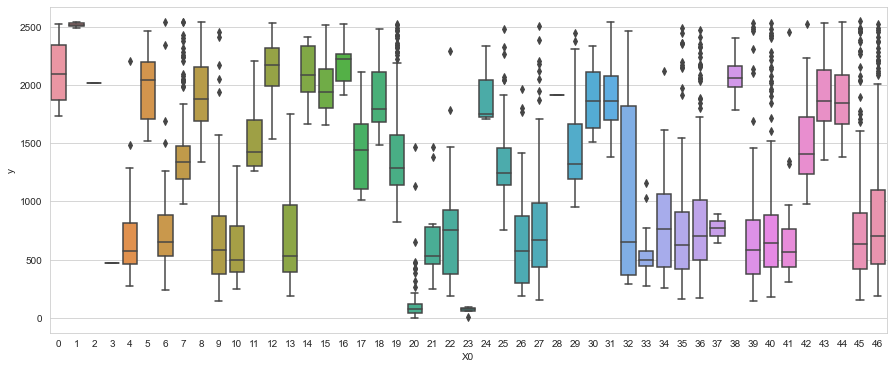

In [26]:
sns.boxplot(x = 'X0', y = 'y', data = train_df)

<AxesSubplot:xlabel='X1', ylabel='y'>

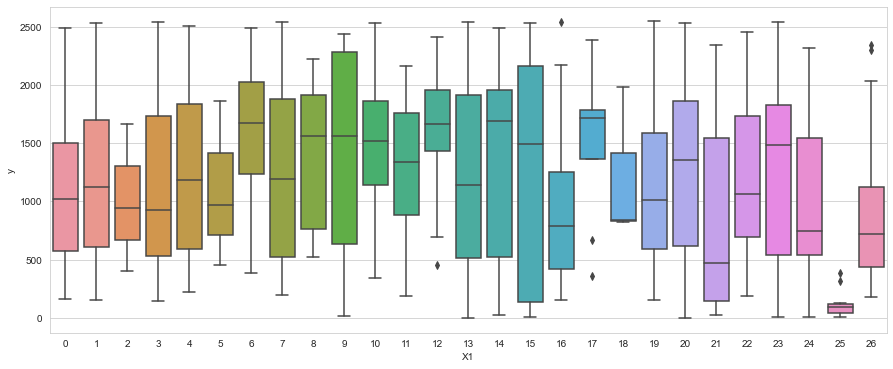

In [27]:
sns.boxplot(x = 'X1', y = 'y', data = train_df)

<AxesSubplot:xlabel='X2', ylabel='y'>

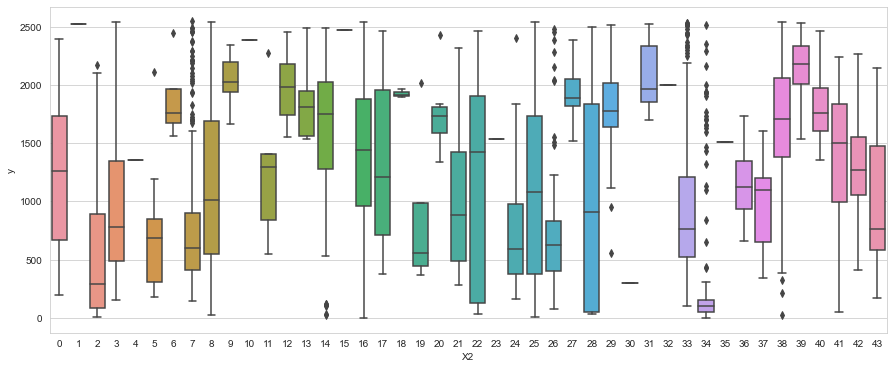

In [28]:
sns.boxplot(x = 'X2', y = 'y', data = train_df)

<AxesSubplot:xlabel='X3', ylabel='y'>

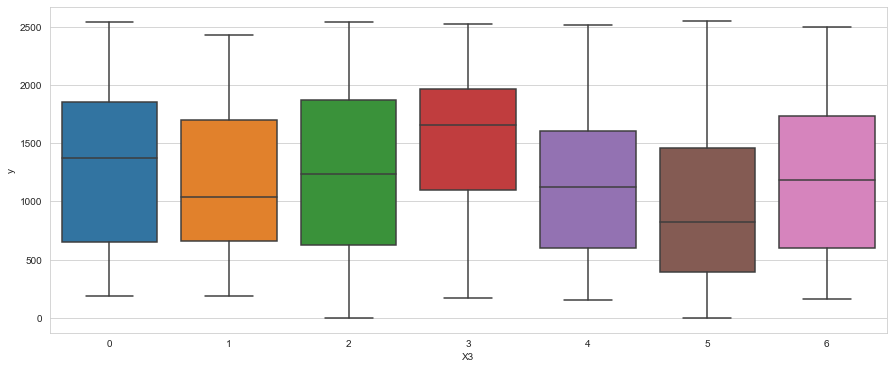

In [29]:
sns.boxplot(x = 'X3', y = 'y', data = train_df)

<AxesSubplot:xlabel='X4', ylabel='y'>

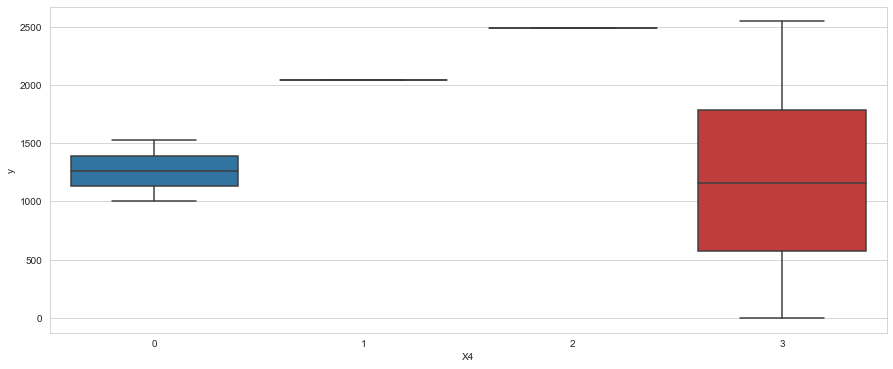

In [30]:
sns.boxplot(x = 'X4', y = 'y', data = train_df)

<AxesSubplot:xlabel='X5', ylabel='y'>

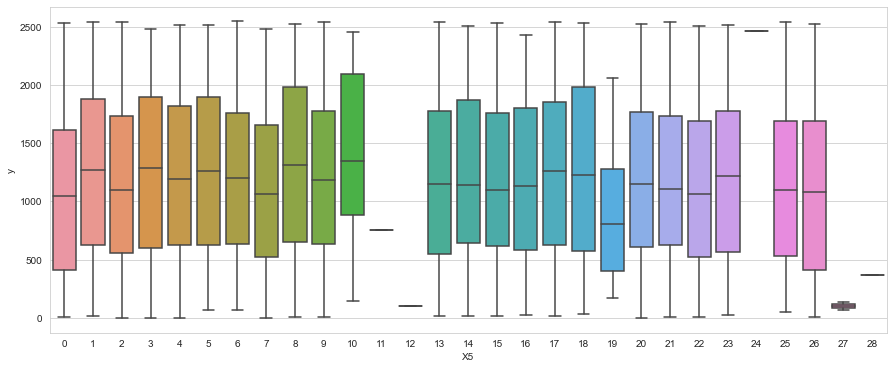

In [31]:
sns.boxplot(x = 'X5', y = 'y', data = train_df)

<AxesSubplot:xlabel='X6', ylabel='y'>

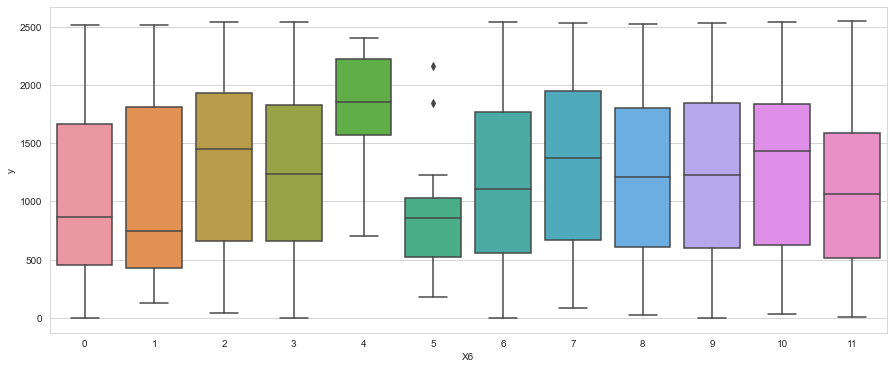

In [32]:
sns.boxplot(x = 'X6', y = 'y', data = train_df)

<AxesSubplot:xlabel='X8', ylabel='y'>

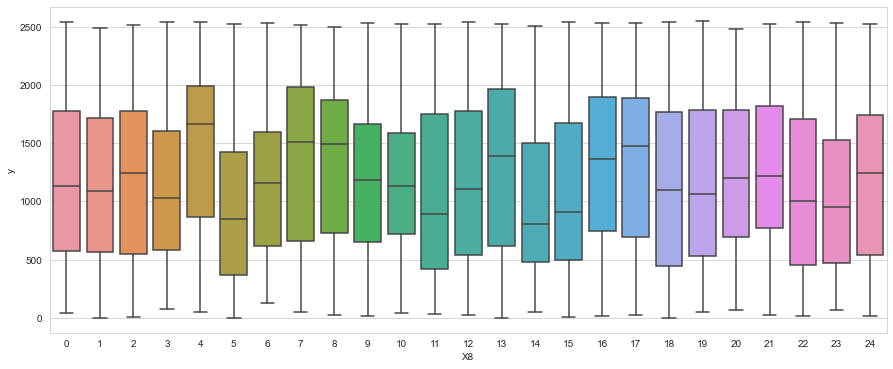

In [33]:
sns.boxplot(x = 'X8', y = 'y', data = train_df)

<AxesSubplot:>

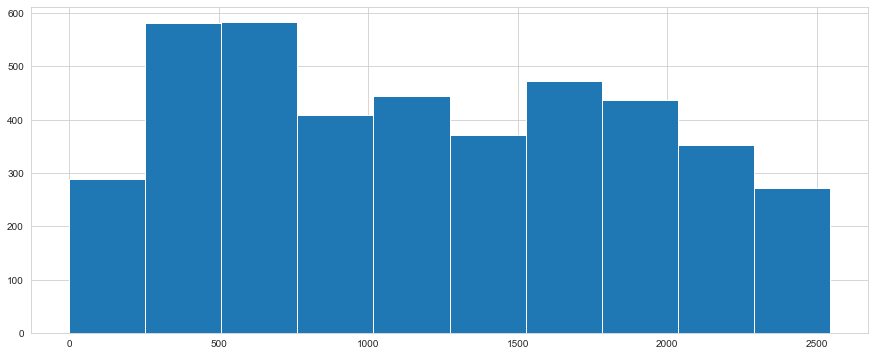

In [34]:
#Now the target y
train_df['y'].hist()

<AxesSubplot:>

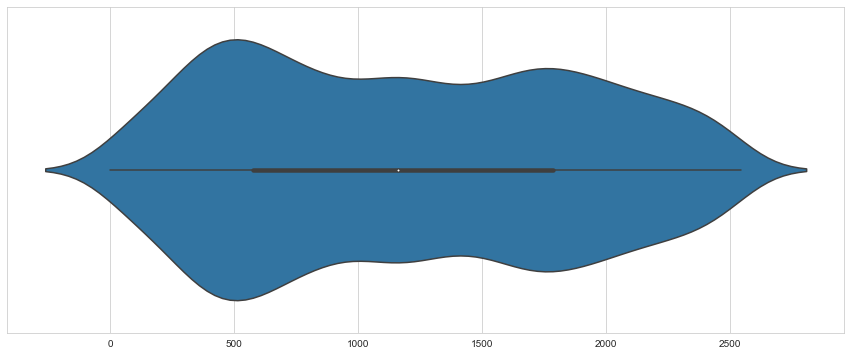

In [35]:
sns.violinplot(train_df['y'].values)


The data seems optimized. The removal of few data points which had no variance had optimized the y. No reason to test for any more outliers. 
Idealy, this test is done first, but if variance 0 is removed, it increases the chances of y being optimized, with no outliers. 


Dimensionality reduction refers to techniques for reducing the number of input variables in training data.
Fewer input dimensions often means correspondingly fewer parameters or a simpler structure in the machine learning model, referred to as degrees of freedom. A model with too many degrees of freedom is likely to overfit the training dataset and may not perform well on new data.

It is desirable to have simple models that generalize well, and in turn, input data with few input variables. This is particularly true for linear models where the number of inputs and the degrees of freedom of the model are often closely related.

Dimensionality reduction is a data preparation technique performed on data prior to modeling. It might be performed after data cleaning and data scaling and before training a predictive model.

Question 4: Perform dimensionality reduction.

The methods at our disposal using linear algebra are: 

Principal Components Analysis
Singular Value Decomposition
Non-Negative Matrix Factorization

In [36]:
# Draw a vertical boxplot grouped 
# by a categorical variable: X0
train_df.describe(include='int64')

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,2104.000000,1200.809931,0.013305,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,1215.177971,694.116229,0.114590,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1052.000000,575.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2104.000000,1161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3156.000000,1784.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4208.000000,2544.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
bin_columns = train_df['ID']
print('\nobject columns:\n',bin_columns)



object columns:
 0          0
1          1
2          2
3          3
4          4
        ... 
4204    4204
4205    4205
4206    4206
4207    4207
4208    4208
Name: ID, Length: 4209, dtype: int64


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_df)
sdata = scaler.transform(train_df)
from sklearn.decomposition import PCA
sdata.shape

(4209, 361)

In [39]:
# lets take top 6 pca components
pca = PCA(n_components=6)
pca.fit(sdata)
x_pca = pca.transform(sdata)
x_pca.shape

# number of components
n_pcs= pca.components_.shape[0]
n_pcs


6

In [40]:
 # get the index of the most important feature on EACH component i.e. largest␣,→absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = bin_columns
most_important


[325, 27, 180, 161, 309, 85]

In [41]:
# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important[i] for i in range(n_pcs)}

In [42]:
dic

{'PC0': 325, 'PC1': 27, 'PC2': 180, 'PC3': 161, 'PC4': 309, 'PC5': 85}

In [43]:
pca.components_

array([[ 0.00298087,  0.04008865, -0.05383831, ...,  0.00264079,
        -0.0010312 , -0.00385943],
       [ 0.0009552 , -0.07749275, -0.04202541, ..., -0.00619854,
        -0.00015713,  0.00249218],
       [ 0.00404084,  0.07298527, -0.07779572, ..., -0.00623733,
         0.0032457 ,  0.01468631],
       [ 0.00105837, -0.06918154,  0.07034037, ..., -0.01677918,
         0.00068049,  0.00571765],
       [ 0.00282563,  0.05230824, -0.02121129, ...,  0.00476864,
        -0.00123327, -0.00107366],
       [-0.00801843, -0.05646235,  0.01216829, ...,  0.00684181,
         0.000352  ,  0.00965898]])

In [44]:
explained_variance = pca.explained_variance_ratio_
explained_variance
#it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the 
#principal axes are the “principal components” of the data. .4 is the var of PCA
#and .179 is the var of PCA2

array([0.06957044, 0.05767919, 0.04598234, 0.03464726, 0.03299007,
       0.03192876])

In [45]:
#Creating training and test data with only these columns

selected_columns = train_df[['ID', 'X325', 'X27', 'X180', 'X161', 'X309', 'X85',  'y']]
X_train = selected_columns.copy()
X_train.shape
X_train

,ID,X325,X27,X180,X161,X309,X85,y
0,0,0,0,0,0,0,1,2466
1,1,0,1,0,0,0,1,366
2,2,0,1,0,0,0,1,69
3,3,0,1,0,0,0,0,133
4,4,0,1,0,0,0,0,106
...,...,...,...,...,...,...,...,...
4204,4204,0,1,0,0,0,1,1657
4205,4205,0,0,0,0,0,0,1766
4206,4206,0,1,0,0,0,1,1801
4207,4207,0,0,0,0,0,0,280


In [46]:
#Now creating a df with only these 5 components

selected_columns = test_df[['ID', 'X325', 'X27', 'X180', 'X161', 'X309', 'X85']]
X_test = selected_columns.copy()
X_test.shape
X_test


,ID,X325,X27,X180,X161,X309,X85
0,1,0,1,0,0,0,0
1,2,0,1,0,1,0,0
2,3,0,1,0,0,0,1
3,4,0,1,0,0,0,0
4,5,0,1,0,0,0,1
...,...,...,...,...,...,...,...
4204,8410,0,1,0,0,0,1
4205,8411,0,1,0,0,0,0
4206,8413,0,1,0,0,0,0
4207,8414,0,1,0,0,0,1


#now will perfrom XGBoost

Predict your test_df values using XGBoost.
Model Selection

Logistic Regression
KNN
SVM
Random Forest

In [47]:
#Now splitting the data into train & test. Before that, identifying all input parameters as X, and output parameter as y
y_train=train_df['y']
y_train


0       2466
1        366
2         69
3        133
4        106
        ... 
4204    1657
4205    1766
4206    1801
4207     280
4208    1921
Name: y, Length: 4209, dtype: int64

In [48]:
y_train.shape

(4209,)

In [49]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [50]:
X_train.shape

(4209, 8)

In [51]:
X_test.shape

(4209, 7)

In [52]:
y_train.shape

(4209,)

In [53]:
#We do not have X & y. Creating X

In [54]:
X = X_train
#X = pd.concat([X_train,X_test])
print(X)

        ID  X325  X27  X180  X161  X309  X85     y
0        0     0    0     0     0     0    1  2466
1        1     0    1     0     0     0    1   366
2        2     0    1     0     0     0    1    69
3        3     0    1     0     0     0    0   133
4        4     0    1     0     0     0    0   106
...    ...   ...  ...   ...   ...   ...  ...   ...
4204  4204     0    1     0     0     0    1  1657
4205  4205     0    0     0     0     0    0  1766
4206  4206     0    1     0     0     0    1  1801
4207  4207     0    0     0     0     0    0   280
4208  4208     0    0     0     0     0    0  1921

[4209 rows x 8 columns]


In [55]:
X.shape

(4209, 8)

In [56]:
#y = pd.concat([y_train,y_train])
y = y_train
y.shape

(4209,)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72)

In [60]:
# Logistic Regression
logreg=LogisticRegression(solver='liblinear',multi_class='ovr')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred
#Accuracy Score
#print(metrics.accuracy_score(y_pred,y_train))
accuracy = (logreg.score(X_train,y_train))
print(accuracy)

0.017311608961303463


In [61]:
# Logistic Regression
logreg=LogisticRegression(solver='lbfgs',multi_class='auto')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred
#Accuracy Score
#print(metrics.accuracy_score(y_pred,y_train))
accuracy = (logreg.score(X_train,y_train))
print(accuracy)

0.00746775288526816


In [62]:
#SVM "Support Vector Classifier"
from sklearn.svm import SVC
svm = SVC(kernel='linear')

# fitting x samples and y classes
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.0958036421219319


In [67]:
#KNN with 5 neighbours
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.0023752969121140144


In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          22       0.00    

In [70]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.011084718923198733


In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          22       0.00    

Text(0, 0.5, 'accuracy')

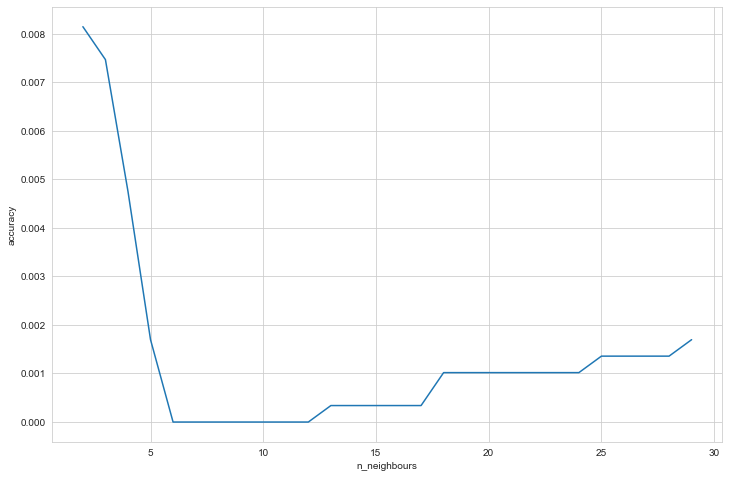

In [83]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())
    
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))

In [84]:
#Random Forests Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc=RandomForestClassifier(n_jobs=-1,random_state=51)
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
print(f1_score(y_test,rfc.predict(X_test),average='macro'))

0.021377672209026127
0.010958631662688942


In [85]:
#Till now SVM followed by Random forest is the leading model

from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn import svm
from xgboost import XGBClassifier
import xgboost as xgb

In [86]:
#Here, we are using XGBRegressor as a Machine Learning model to fit the data.
model = xgb.XGBRegressor(booster='dart', objective='reg:squarederror', num_class = 1,  eval_metric = 'merror', n_estimators = 10, seed = 123)
model.fit(X_train, y_train)
print(); print(model)

# Predict the model
pred = model.predict(X_test)


XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8, num_class=1,
             num_parallel_tree=1, random_state=123, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=123, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [87]:
# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  41.334797


In [88]:
expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.r2_score(y_test, predicted_y))

0.9964555983971704


In [89]:
predicted_y

array([1535.3035 , 2051.473  ,  856.6799 , ...,  793.9099 , 1325.2578 ,
        211.49554], dtype=float32)

In [90]:
#Here, we are using XGBRegressor as a Machine Learning model to fit the data.
model = xgb.XGBRegressor(booster='gblinear', objective='reg:squarederror', num_class = 1,  eval_metric = 'merror', n_estimators = 10, seed = 123)
model.fit(X_train, y_train)
print(); print(model)

# Predict the model
pred = model.predict(X_test)


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, eval_metric='merror',
             gamma=None, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.5,
             max_delta_step=None, max_depth=None, min_child_weight=None,
             missing=nan, monotone_constraints=None, n_estimators=10, n_jobs=8,
             num_class=1, num_parallel_tree=None, random_state=123, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, seed=123, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=None)


In [91]:
# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  196.384819


In [92]:
expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.r2_score(y_test, predicted_y))

0.9199931585102286


In [93]:
#As we see gbliner is not the right model. 
#Here, we are using XGBRegressor as a Machine Learning model to fit the data.
model = xgb.XGBRegressor(booster='gbtree', objective='reg:squarederror', num_class = 1,  eval_metric = 'merror', n_estimators = 10, seed = 123)
model.fit(X_train, y_train)
print(); print(model)

# Predict the model
pred = model.predict(X_test)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8, num_class=1,
             num_parallel_tree=1, random_state=123, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=123, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [94]:
# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  41.334797


In [95]:
expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.r2_score(y_test, predicted_y))

0.9964555983971704


In [96]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
print(); print(model)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


<AxesSubplot:xlabel='y'>

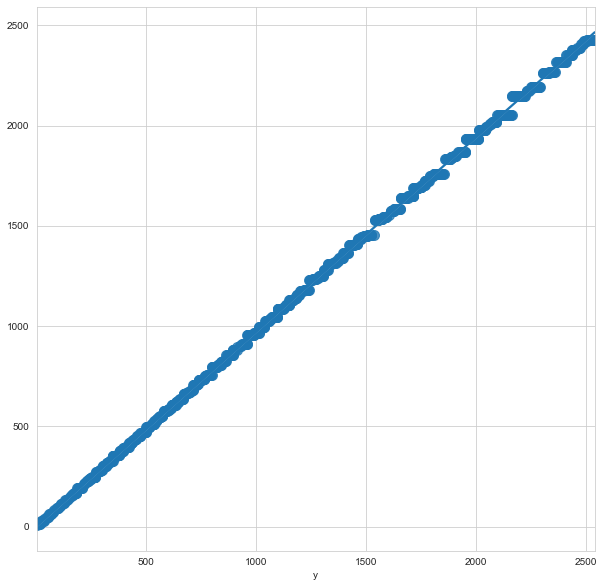

In [97]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

In [98]:
#e'll check the training accuracy with cross-validation and k-fold methods.
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.00


In [99]:
#Now we have predicted the output by passing X_test and also stored real target in expected_y.
expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.r2_score(expected_y, predicted_y))

0.9999877471875119


#This is the best model so far
#Q 5. Predicting y with XGBoost

In [107]:
#Displaying predicted values

predicted_y

array([1571.9796 , 2096.447  ,  880.59326, ...,  814.5298 , 1368.8103 ,
        217.89659], dtype=float32)